In [1]:
import torch

In [2]:
sh3frag_to_SH3model = torch.load("1kq2A00_frags_vs_SH3_elbo-elbo-elbo.pt")

In [3]:
sh3frag_to_OBmodel = torch.load("1kq2A00_frags_vs_OB_elbo-elbo-elbo.pt")

In [4]:
obfrag_to_SH3model = torch.load("1uebA03_frags_vs_SH3_elbo-elbo-elbo.pt")

In [5]:
obfrag_to_OBmodel = torch.load("1uebA03_frags_vs_OB_elbo-elbo-elbo.pt")

In [6]:
sh3frag_to_SH3model

tensor([0.0950, 0.1373, 0.1142, 0.1400, 0.1023, 0.1226, 0.1000, 0.1400, 0.0909,
        0.0932, 0.1216, 0.1138, 0.1167, 0.1393, 0.1405, 0.1334, 0.1340, 0.1261,
        0.1200, 0.1072, 0.1376, 0.1344, 0.1407, 0.1339, 0.1142, 0.1159, 0.1438,
        0.1289, 0.1304, 0.1136, 0.0936, 0.0996, 0.1206, 0.1201, 0.1301, 0.1436,
        0.1495, 0.1298, 0.1348, 0.0833, 0.0821, 0.0866, 0.1343, 0.1232, 0.1312,
        0.1320, 0.1361, 0.1029, 0.1254, 0.1306, 0.1347, 0.1168, 0.1261, 0.1359,
        0.1039, 0.0994, 0.1092, 0.1373, 0.0898, 0.1347])

In [7]:
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [9]:
from DeepUrfold.Analysis.AllVsAll import get_representative_domains

Unable to run StochasticBlockModel without graph_tool
Unable to run overlap_score without graph_tool
INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [10]:
representatives = get_representative_domains(["2.30.30.100", "2.40.50.140"], "/home/ed4bu/deepurfold-paper-2.h5")

['2.30.30.100', '2.40.50.140']


In [11]:
representatives

,cathDomain,superfamily
0,2ylbC00,2.30.30.100
1,2vc8A00,2.30.30.100
2,5szdC00,2.30.30.100
3,3hfoB00,2.30.30.100
4,1mgqF00,2.30.30.100
...,...,...
222,1yvcA00,2.40.50.140
223,1d7qA00,2.40.50.140
224,3o2zP00,2.40.50.140
225,3o2zF00,2.40.50.140


In [12]:
import pandas as pd

In [13]:
sh3_elbo = pd.read_csv("/home/bournelab/DeepUrfold-updated_results/superfamily_models_results/2.30.30.100/elbo.csv")

In [14]:
sh3_elbo

,cathDomain,2.30.30.100
0,1xmkA00,0.137814
1,4co8A00,0.139659
2,3iwfB00,0.135257
3,1r7jA00,0.139363
4,2fq3A00,0.132161
...,...,...
3669,2a9dA01,0.138689
3670,2blfA01,0.142126
3671,5k3xB01,0.135303
3672,2biiA01,0.140271


In [15]:
sh3_elbo = sh3_elbo[sh3_elbo.cathDomain.isin(representatives[representatives.superfamily=="2.30.30.100"].cathDomain)]

In [16]:
sh3_elbo = sh3_elbo.set_index("cathDomain")["2.30.30.100"].values

In [17]:
sh3_ob_elbo = pd.read_csv("/home/bournelab/DeepUrfold-updated_results/superfamily_models_results/2.30.30.100/elbo.csv")
sh3_ob_elbo = sh3_ob_elbo[sh3_ob_elbo.cathDomain.isin(representatives[representatives.superfamily=="2.40.50.140"].cathDomain)]
sh3_ob_elbo = sh3_ob_elbo.set_index("cathDomain")["2.30.30.100"].values

In [18]:
from pylab import rcParams
params = {
   'axes.labelsize': 6,
   'font.size': 12,
   #'title.fontweight': 'bold',
   'legend.fontsize': 10,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'text.usetex': True,
   'text.latex.preamble': r'\usepackage{xcolor}',
   }
rcParams.update(params)

In [19]:
%matplotlib agg
%matplotlib agg
fig, axd = plt.subplot_mosaic([['sh3_perm', 'ob_perm', 'sh3_term'],
                               ['ob_term',  'legend',  'legend']],
                              figsize=(8,5), #layout="constrained",
                             sharex=True,sharey=True)

In [20]:
axd

{'sh3_perm': <Axes: label='sh3_perm'>,
 'ob_perm': <Axes: label='ob_perm'>,
 'sh3_term': <Axes: label='sh3_term'>,
 'ob_term': <Axes: label='ob_term'>,
 'legend': <Axes: label='legend'>}

In [21]:
sns.kdeplot(sh3frag_to_SH3model.numpy(), label="SH3 TERMs", color='#DD7C83', linestyle="--", linewidth=1, ax=axd["sh3_term"])
sns.kdeplot(obfrag_to_SH3model.numpy(), label="OB TERMs", color="#4CBFE8", linestyle="--", linewidth=1, ax=axd["sh3_term"])
sns.kdeplot(sh3_elbo, label="SH3 Representatives", color="#BE1E2D", linewidth=3, ax=axd["sh3_term"])
sns.kdeplot(sh3_ob_elbo, label="OB Representatives", color="#2880B2", linewidth=1, ax=axd["sh3_term"])
#plt.legend()
axd["sh3_term"].set_xlabel("-(ELBO)")
#axd["sh3_term"].set_title("SH3-Only Model")
#plt.savefig("sh3_only_TERMS.png", dpi=300)
axd['sh3_term'].text(0.048, 72, "(\\textbf{{C}})", fontsize=10)
axd['sh3_term'].text(0.063, 72, r"\textcolor[HTML]{BE1E2D}{\textbf{SH3}} Fragments", fontsize=10) 
axd['sh3_term'].text(0.063, 66, r"vs an \textcolor[HTML]{BE1E2D}{\textbf{SH3-only}}", fontsize=10)
axd['sh3_term'].text(0.063, 60, "model", fontsize=10)
axd['sh3_term'].xaxis.set_tick_params(labelbottom=True)
axd['sh3_term'].tick_params(which='both', top=False, bottom=True, left=False, right=False, labelbottom=True)

In [22]:
ob_elbo = pd.read_csv("/home/bournelab/DeepUrfold-updated_results/superfamily_models_results/2.40.50.140/elbo.csv")
ob_elbo = ob_elbo[ob_elbo.cathDomain.isin(representatives[representatives.superfamily=="2.40.50.140"].cathDomain)]

In [23]:
ob_elbo = ob_elbo.set_index("cathDomain")["2.40.50.140"].values
ob_elbo

array([0.13702302, 0.13286224, 0.13447182, 0.13634796, 0.1411682 ,
       0.14154284, 0.13698421, 0.13639927, 0.13561496, 0.13601919,
       0.13654505, 0.13530688, 0.13298307, 0.13776134, 0.13333103,
       0.13962723, 0.13297684, 0.1374722 , 0.13185415, 0.13278729,
       0.13433647, 0.13988537, 0.13467076, 0.13785592, 0.135196  ,
       0.13844708, 0.13353322, 0.12755279, 0.13464396, 0.13066357,
       0.13575527, 0.1331401 , 0.13547133, 0.13310747, 0.13413513,
       0.13651617, 0.14398374, 0.14180899, 0.13531853, 0.13764508,
       0.13780174, 0.13544208, 0.13358752, 0.13617432, 0.13469741,
       0.14065768, 0.13171066, 0.13642484, 0.14679371, 0.143679  ,
       0.13867587, 0.13659921, 0.13275048, 0.13469793, 0.13231683,
       0.13362463, 0.13980119, 0.1369676 , 0.13777982, 0.1369508 ,
       0.13143243, 0.13490981, 0.1300046 , 0.13877258, 0.12962829,
       0.12964761, 0.13498046, 0.13247606, 0.13130194, 0.13050692,
       0.1364599 , 0.13690276, 0.1378117 , 0.14394975, 0.13315

In [24]:
ob_sh3_elbo = pd.read_csv("/home/bournelab/DeepUrfold-updated_results/superfamily_models_results/2.40.50.140/elbo.csv")
ob_sh3_elbo = ob_sh3_elbo[ob_sh3_elbo.cathDomain.isin(representatives[representatives.superfamily=="2.30.30.100"].cathDomain)]

In [25]:
ob_sh3_elbo = ob_sh3_elbo.set_index("cathDomain")["2.40.50.140"].values
ob_sh3_elbo

array([0.13577053, 0.13424443, 0.13417234, 0.13862096, 0.13733359,
       0.13725963, 0.14179757, 0.13260657, 0.14826992, 0.13521853,
       0.14581756, 0.13491343, 0.13145977, 0.14913136, 0.15133844,
       0.1489759 , 0.1430998 , 0.12979966, 0.13666771, 0.13744949,
       0.12938333, 0.13124654, 0.1445748 , 0.13609113, 0.13265389,
       0.12680389, 0.13945374, 0.14477243, 0.13737808, 0.13251121,
       0.13534604, 0.13092002, 0.1296935 , 0.13111058, 0.12719344,
       0.13797222, 0.12995288, 0.13043699, 0.12705143, 0.13325016,
       0.12380031, 0.14168832, 0.13727614, 0.13744237, 0.13370608,
       0.13699558, 0.12581626, 0.12865151, 0.13267799, 0.13005206,
       0.14264672, 0.143137  , 0.13308556, 0.13415433, 0.12913464,
       0.12142305])

In [26]:
sns.kdeplot(sh3frag_to_OBmodel.numpy(), label="SH3 TERMs", color='#DD7C83', linestyle="--", linewidth=1, ax=axd["ob_term"])
sns.kdeplot(obfrag_to_OBmodel.numpy(), label="OB TERMs", color="#4CBFE8", linestyle="--", linewidth=1, ax=axd["ob_term"])
sns.kdeplot(ob_elbo, label="OB Representatives", color="#2880B2", linewidth=3, ax=axd["ob_term"])
sns.kdeplot(ob_sh3_elbo, label="SH3 Representatives", color="#BE1E2D", linewidth=1, ax=axd["ob_term"])
#plt.legend()
axd["ob_term"].set_xlabel("-(ELBO)")
#axd["ob_term"].set_title("OB-Only Model")
#plt.savefig("ob_only_TERMS.png", dpi=300)
axd['ob_term'].text(0.048, 72, "(\\textbf{{D}})", fontsize=10)
axd['ob_term'].text(0.063, 72, r"\textcolor[HTML]{2880B2}{\textbf{OB}} Fragments", fontsize=10) 
axd['ob_term'].text(0.063, 66, r"vs an \textcolor[HTML]{2880B2}{\textbf{OB-only}}", fontsize=10)
axd['ob_term'].text(0.063, 60, "model", fontsize=10)
axd['ob_term'].xaxis.set_tick_params(labelbottom=True)

In [27]:
distance_file = "/home/bournelab/DeepUrfold-updated_results/comparison/tmalign/all_distances.csv"
distances = pd.read_csv(distance_file)
distances.chain1 = distances.chain1.apply(lambda s: s.split("/")[-1].split(".")[0])
distances.chain2 = distances.chain2.apply(lambda s: s.split("/")[-1].split(".")[0])

In [28]:
distances.head()

,Unnamed: 0,chain1,chain2,rmsd,moving_tm_score,fixed_tm_score
0,0,1xmkA00,4co8A00,3.08,0.55923,0.47596
1,1,1xmkA00,3iwfB00,3.35,0.48692,0.45279
2,2,1xmkA00,1r7jA00,2.60,0.62223,0.56055
3,3,1xmkA00,2fq3A00,2.32,0.54607,0.51675
4,4,1xmkA00,5it3A00,2.32,0.55082,0.52018


In [29]:
#Get scores for representives vs all with a score <=0.3
dissimalar_to_sh3 = distances[
    (distances.chain1.isin(representatives[representatives.superfamily=="2.30.30.100"].cathDomain))&\
    (distances.moving_tm_score<=0.3)]

In [30]:
sh3_background_elbo = pd.read_csv("/home/bournelab/DeepUrfold-updated_results/superfamily_models_results/2.30.30.100/elbo.csv")
sh3_background_elbo = sh3_background_elbo[sh3_background_elbo.cathDomain.isin(dissimalar_to_sh3.chain2)]
sh3_background_elbo = sh3_background_elbo.set_index("cathDomain")["2.30.30.100"].values

In [31]:
sh3_background_elbo

array([0.11957394, 0.13818094, 0.13292186, ..., 0.14212646, 0.14027086,
       0.14090754])

In [32]:
sh3_perms_to_sh3 = torch.load("../permutations/sh3_perms_vs_SH3_elbo_wROTS4-elbo-elbo.pt")

In [33]:
ob_perms_to_sh3 = torch.load("../permutations/ob_perms_vs_SH3_elbo-elbo-elbo.pt")

In [34]:
sh3_rep_to_sh3 = torch.load("1kq2A00_vs_SH3_elbo-elbo-elbo.pt")
ob_rep_to_sh3 = torch.load("1uebA03_vs_SH3_elbo_v2-elbo-elbo.pt")

In [35]:
sns.kdeplot(sh3_background_elbo, label="Background", color="#A09747", linewidth=1, ax=axd['sh3_perm'])
sns.kdeplot(sh3_elbo, label="SH3 Representatives", color="#BE1E2D", linewidth=3, ax=axd['sh3_perm'])
sns.kdeplot(sh3_ob_elbo, label="OB Representatives", color="#2880B2", linewidth=1, ax=axd['sh3_perm'])
sns.kdeplot(sh3_perms_to_sh3.numpy(), label="SH3 Perumtants", color='#DD7C83', linewidth=1, ax=axd['sh3_perm'])
#sns.kdeplot(ob_perms_to_sh3.numpy(), label="OB Perumtants", color='#4CBFE8', linewidth=1, ax=axd['sh3_perm'])
sns.rugplot(sh3_rep_to_sh3, color="#BE1E2D", label="1kq2A00 (SH3 WT) tick", linewidth=1, ax=axd['sh3_perm'])
#sns.rugplot(ob_rep_to_sh3, color="#2880B2", label="1uebA03 (OB WT) tick", linewidth=1, ax=axd['sh3_perm'])
#plt.title("SH3-Only Model")
#plt.legend()
axd['sh3_perm'].set_xlabel("-(ELBO)")
axd['sh3_perm'].text(0.048, 72, "(\\textbf{{A}})", fontsize=10)
axd['sh3_perm'].text(0.063,  72, r"\textcolor[HTML]{BE1E2D}{\textbf{SH3}} Permutants", fontsize=10) 
axd['sh3_perm'].text(0.063,  66, r"vs an \textcolor[HTML]{BE1E2D}{\textbf{SH3-only}}", fontsize=10)
axd['sh3_perm'].text(0.063,  60, "model", fontsize=10)
#plt.savefig("sh3_only_permutants.png", dpi=300)

im_sh3_perm = plt.imread("/home/bournelab/DeepUrfold/DeepUrfold/figures/1kq2A00_vs_MLP.png")
imagebox_sh3_perm = OffsetImage(im_sh3_perm, zoom=0.04)
imagebox_sh3_perm.image.axes = axd['sh3_perm']

ab_sh3_perm = AnnotationBbox(imagebox_sh3_perm, (.25,.55),
    #xybox=(120., -80.),
    xycoords='axes fraction',
    boxcoords="axes fraction",
    #pad=0.5,
    frameon=False,
)

axd['sh3_perm'].add_artist(ab_sh3_perm)
axd['sh3_perm'].xaxis.set_tick_params(labelbottom=True)


# sh3_perms_to_sh3.min(), sh3_perms_to_sh3.max(), sh3_perms_to_sh3.mean()

In [36]:
#Get scores for representives vs all with a score <=0.3
dissimalar_to_ob = distances[
    (distances.chain1.isin(representatives[representatives.superfamily=="2.40.50.140"].cathDomain))&\
    (distances.moving_tm_score<=0.3)]

In [37]:
ob_background_elbo = pd.read_csv("/home/bournelab/DeepUrfold-updated_results/superfamily_models_results/2.40.50.140/elbo.csv")
ob_background_elbo = ob_background_elbo[ob_background_elbo.cathDomain.isin(dissimalar_to_ob.chain2)]
ob_background_elbo = ob_background_elbo.set_index("cathDomain")["2.40.50.140"].values

In [38]:
sh3_perms_to_ob = torch.load("../permutations/sh3_perms_vs_OB_elbo-elbo-elbo.pt")
ob_perms_to_ob = torch.load("../permutations/ob_perms_vs_OB_elbo-elbo-elbo.pt")

In [39]:
sh3_rep_to_ob = torch.load("1kq2A00_vs_OB_elbo_v2-elbo-elbo.pt")
ob_rep_to_ob = torch.load("1uebA03_vs_OB_elbo_v2-elbo-elbo.pt")

In [40]:
sns.kdeplot(ob_background_elbo, label="Background", color="#A09747", linewidth=1, ax=axd['ob_perm'])
sns.kdeplot(ob_elbo, label="OB Representatives", color="#2880B2", linewidth=3, ax=axd['ob_perm'])
sns.kdeplot(ob_sh3_elbo, label="SH3 Representatives", color="#BE1E2D", linewidth=1, ax=axd['ob_perm'])
#sns.kdeplot(sh3_perms_to_ob.numpy(), label="SH3 Perumtants", color='#DD7C83', linewidth=1, ax=axd['ob_perm'])
sns.kdeplot(ob_perms_to_ob.numpy(), label="OB Perumtants", color='#4CBFE8', linewidth=1, ax=axd['ob_perm'])
#sns.rugplot(sh3_rep_to_ob, color="#BE1E2D", label="1kq2A00 (SH3 WT) tick", linewidth=1, ax=axd['ob_perm'])
sns.rugplot(ob_rep_to_ob, color="#2880B2", label="1uebA03 (OB WT) tick", linewidth=1, ax=axd['ob_perm'])
#plt.title("OB-Only Model")
#plt.legend()
axd['ob_perm'].set_xlabel("-(ELBO)")
axd['ob_perm'].text(0.048, 72, "(\\textbf{{B}})", fontsize=10)
axd['ob_perm'].text(0.063, 72, r"\textcolor[HTML]{2880B2}{\textbf{OB}} Permutants", fontsize=10) 
axd['ob_perm'].text(0.063, 66, r"vs an \textcolor[HTML]{2880B2}{\textbf{OB-only}}", fontsize=10)
axd['ob_perm'].text(0.063, 60, "model", fontsize=10)
#plt.savefig("ob_only_permutants.png", dpi=300, bbox_inches="tight")

im_ob_perm = plt.imread("/home/bournelab/DeepUrfold/DeepUrfold/figures/1uebA03_vs_MLP.png")
imagebox_ob_perm = OffsetImage(im_ob_perm, zoom=0.04)
imagebox_ob_perm.image.axes = axd['ob_perm']

ab_ob_perm = AnnotationBbox(imagebox_ob_perm, (.25,.55),
    #xybox=(120., -80.),
    xycoords='axes fraction',
    boxcoords="axes fraction",
    #pad=0.5,
    frameon=False,
)

axd['ob_perm'].add_artist(ab_ob_perm)
axd['ob_perm'].xaxis.set_tick_params(labelbottom=True)
axd['ob_perm'].tick_params(which='both', top=False, bottom=True, left=False, right=False, labelbottom=True)
axd['ob_perm'].set_xlabel("-(ELBO)")

Text(0.5, 254.58333333333337, '-(ELBO)')

In [41]:
axd['legend'].plot([], [], label="SH3 Representatives", color="#BE1E2D")
axd['legend'].plot([], [], label="SH3 Permutants (derived from 1kq2A00 SH3 wild-type)", color='#DD7C83')
axd['legend'].plot([], [], label="SH3 Fragments (TERMs derived from 1kq2A00 SH3 wild-type)", color='#DD7C83', linestyle="--")
axd['legend'].plot([], [], label="1kq2A00 SH3 wild-type, 500 random rotations (x-axis ticks)", color="black", markerfacecolor="#BE1E2D", markeredgecolor="#BE1E2D", marker=2)
axd['legend'].plot([], [], label="OB Representatives", color="#2880B2")
axd['legend'].plot([], [], label="OB Permutatants (derived from 1uebA03 OB wild-type)", color='#4CBFE8')
axd['legend'].plot([], [], label="SH3 Fragments (TERMs derived from 1uebA03 OB wild-type)", color='#4CBFE8', linestyle="--")
axd['legend'].plot([], [], label="1uebA03 OB wild-type, 500 random rotations (x-axis ticks)", color="black", markerfacecolor="#2880B2", markeredgecolor="#2880B2", marker=2)
axd['legend'].plot([], [], label="Background (TM-Score $\leq$ 0.3 to model representatives)", color="#A09747")
axd['legend'].axis('off')
axd['legend'].legend(loc='center', frameon=False)
plt.subplots_adjust(wspace=0.05, hspace=0.2)
#plt.tight_layout()
plt.savefig("4panels.eps", dpi=600)
plt.savefig("4panels.svg", dpi=600)
plt.savefig("4panels.pdf", dpi=600)

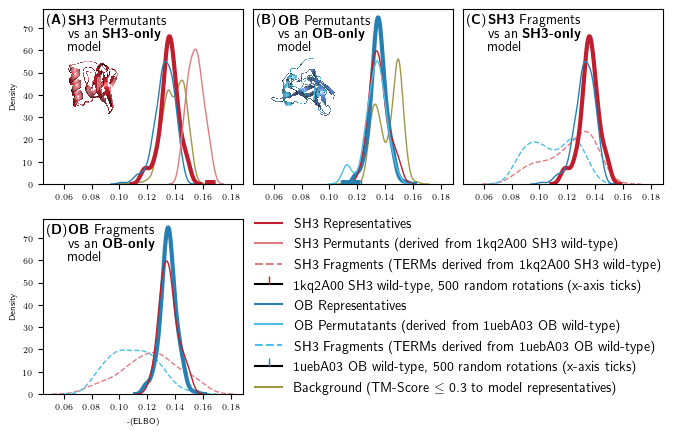

In [42]:
%matplotlib inline
plt.show()